In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [186]:
#Caricamento del dataset
df = pd.read_csv('train.csv')

In [187]:
#Ispezione rapida
print("--- Prime 5 righe del dataset ---")
print(df.head())

print("\n--- Informazioni sul dataset ---")
print(df.info())



--- Prime 5 righe del dataset ---
   id  age  alcohol_consumption_per_week  physical_activity_minutes_per_week  \
0   0   31                             1                                  45   
1   1   50                             2                                  73   
2   2   32                             3                                 158   
3   3   54                             3                                  77   
4   4   54                             1                                  55   

   diet_score  sleep_hours_per_day  screen_time_hours_per_day   bmi  \
0         7.7                  6.8                        6.1  33.4   
1         5.7                  6.5                        5.8  23.8   
2         8.5                  7.4                        9.1  24.1   
3         4.6                  7.0                        9.2  26.6   
4         5.7                  6.2                        5.1  28.8   

   waist_to_hip_ratio  systolic_bp  ...  gender  ethnicity

In [188]:
object_df = df.select_dtypes(include=[np.object_])
object_df.nunique()

gender               3
ethnicity            5
education_level      4
income_level         5
smoking_status       3
employment_status    4
dtype: int64

In [189]:
unique_values = object_df.apply(lambda x: x.unique())
print(unique_values)

gender                                         [Female, Male, Other]
ethnicity                     [Hispanic, White, Asian, Black, Other]
education_level      [Highschool, Graduate, Postgraduate, No formal]
income_level         [Lower-Middle, Upper-Middle, Low, Middle, High]
smoking_status                              [Current, Never, Former]
employment_status           [Employed, Retired, Student, Unemployed]
dtype: object


In [190]:
dummies_col = [
    "gender",
    "ethnicity",
    "education_level",
    "smoking_status",
    "employment_status"
]

df = pd.get_dummies(df, columns=dummies_col, drop_first=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 35 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                

In [191]:
income_level_to_value = {'Lower-Middle' : 2, 'Upper-Middle':4, 'Low': 1, 'Middle':3, 'High':5}
df['income_level'] = df['income_level'].map(income_level_to_value)
df = pd.get_dummies(df, drop_first=True)

In [192]:
with pd.option_context('display.max_columns', None):
    display(df.head())

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,income_level,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes,gender_Male,gender_Other,ethnicity_Black,ethnicity_Hispanic,ethnicity_Other,ethnicity_White,education_level_Highschool,education_level_No formal,education_level_Postgraduate,smoking_status_Former,smoking_status_Never,employment_status_Retired,employment_status_Student,employment_status_Unemployed
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,62,199,58,114,102,2,0,0,0,1.0,False,False,False,True,False,False,True,False,False,False,False,False,False,False
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,71,199,50,121,124,4,0,0,0,1.0,False,False,False,False,False,True,True,False,False,False,True,False,False,False
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,89,73,188,59,114,108,2,0,0,0,0.0,True,False,False,True,False,False,True,False,False,False,True,True,False,False
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,69,74,182,54,85,123,2,0,1,0,1.0,False,False,False,False,False,True,True,False,False,False,False,False,False,False
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,60,85,206,49,131,124,4,0,1,0,1.0,True,False,False,False,False,True,True,False,False,False,True,True,False,False


In [193]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,700000.0,349999.500000,202072.738554,0.00,174999.75,349999.50,524999.25,699999.00
age,700000.0,50.359734,11.655520,19.00,42.00,50.00,58.00,89.00
alcohol_consumption_per_week,700000.0,2.072411,1.048189,1.00,1.00,2.00,3.00,9.00
physical_activity_minutes_per_week,700000.0,80.230803,51.195071,1.00,49.00,71.00,96.00,747.00
diet_score,700000.0,5.963695,1.463336,0.10,5.00,6.00,7.00,9.90
sleep_hours_per_day,700000.0,7.002200,0.901907,3.10,6.40,7.00,7.60,9.90
screen_time_hours_per_day,700000.0,6.012733,2.022707,0.60,4.60,6.00,7.40,16.50
bmi,700000.0,25.874684,2.860705,15.10,23.90,25.90,27.80,38.40
waist_to_hip_ratio,700000.0,0.858766,0.037980,0.68,0.83,0.86,0.88,1.05
systolic_bp,700000.0,116.294193,11.010390,91.00,108.00,116.00,124.00,163.00


### OSSERVAZIONI 

### COLONNA TARGET

- ## media: 0.62. A differenza della realtà abbiamo tanti casi di diabete. Ma aspetta, la colonna diabete sono solo 0 e 1 (lo ha e non lo ha) oppure 0,1,2? Perchè a seconda di questo cambia il modo di valutare la media

In [194]:
df["diagnosed_diabetes"].unique()

array([1., 0.])

Quindi non ci troviamo davanti un dataset sbilanciato con un caso di diabete ogni x sani, ma quasi uno ogni due

Siccome il dataset è bilanciato su target , non devo fare operazioni per bilanciarlo artificialmente o usare strumenti tipo stratified kfold/creare righe duplicate etc...

### GUARDIAMO ADESSO MINIMI E MASSIMI DELLE NOSTRE COLONNE

A livello di minimi massimi da tenere d'occhio non c'è nulla di significativo

### Dispersione 

Ci sono valori di deviazione standard molto elevati?

No la deviazione standard non ha livelli allarmanti in nessuna colonna


### Mediana

Ci sono feature mediana tanto differenti dalla media?

physical_activity_minutes_per_week = 80.230803 mediana = 71.00

### Fare approfondimento su physical_activity_minutes_per_week



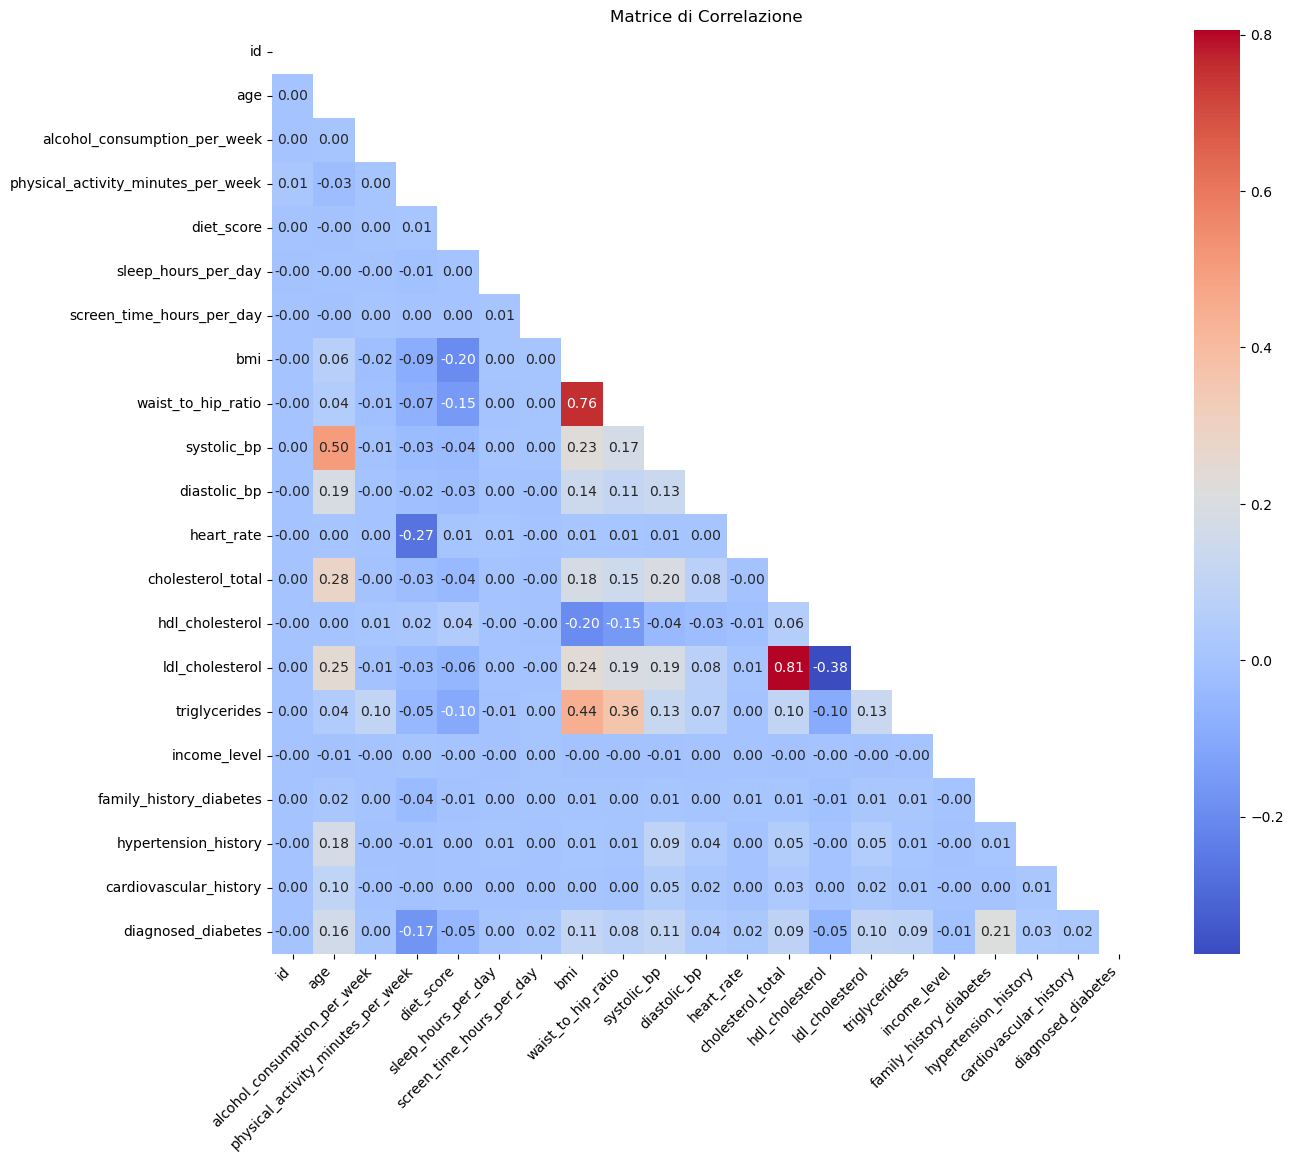

In [195]:
corr = numeric_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(14, 12))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Matrice di Correlazione')
plt.show()
